In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
  
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, 
                                         maxlen = max_sequence_len, 
                                         padding = 'pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(label, 
                          num_classes = total_words)

--2019-09-23 14:37:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-09-23 14:37:51 (151 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, 
                    input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation = 'relu', 
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
____________________________________________________________

In [5]:
 history = model.fit(predictors, label, 
                     epochs = 100, 
                     verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
15462/15462 [==============================] - 43s 3ms/sample - loss: 6.9074 - acc: 0.0229
Epoch 2/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.4930 - acc: 0.0219
Epoch 3/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.3741 - acc: 0.0246
Epoch 4/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.2519 - acc: 0.0292
Epoch 5/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.1598 - acc: 0.0365
Epoch 6/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.0760 - acc: 0.0385
Epoch 7/100
15462/15462 [==============================] - 42s 3ms/sample - loss: 5.9952 - acc: 0.0412
Epoch 8/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 5.9051 - acc: 0.0460
Epoch 9/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 

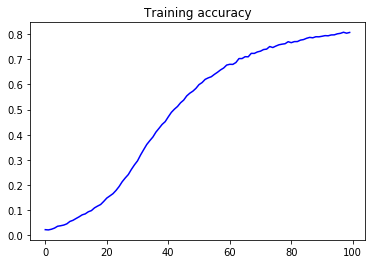

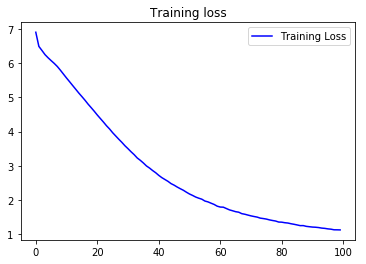

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], 
                             maxlen = max_sequence_len-1, 
                             padding = 'pre')
	predicted = model.predict_classes(token_list, verbose = 0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope that thou dost reap reap ride twain burn'd after show heaven sweet youth lived ' alone so much made such had thee now weep young still dear age hate must true be won nourish'd by stand twain ' twain live o'er pleasure still still ride date torn torn scope doth hill night long now now tell good stand groan still still write good ' still hence sit prove write thee still alone hate young write true me green my friend prove thee so true ' told good stand hate lies lies buried rhyme torn near confined friend lies dyed '
